## Example of Analogical Reasoning Using The Test Set Provided by Mikolov et al.

We will use only part of the dataset provided, since it can not be tested as a whole by our model

In [1]:
import os
import sys
sys.path.append(os.getcwd() + "/../../") # notebooks are in a folder inside the project
from kge_from_text import folder_definitions as fd
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

Here we define some handy variables for later

In [3]:
entity_vector_name = "2016_data/entity_vectors"
type_vector_name = "2016_data/type_vectors"
conactenated_name = "2016_data/concatenated_vectors"
conactenated_name_time = "2016_data/concatenated_vectors_time"
temporal_csv = "2016_data/temporal_vectors.csv"

annotated_entity_file = "2016_data/annotated_text_with_entities"
annotated_type_file = "2016_data/annotated_text_with_types"
type_of_entity_file = "2016_data/type_to_entity_data.ttl"

annotated_wikidata_type_file = "2016_data/annotated_abstracts_with_WD_types_2016"

## Models can be generated using input files or can be loaded (if they already exists)

In [3]:
# TYPE
import kge_from_text.models.term_embeddings as tt

model_t = tt.TermEmbedding("type_dbpedia_wikidata")
model_t.fit(input_text=fd.STARTING_DATA_ROOT + annotated_wikidata_type_file, output_file_path=fd.PRODUCED_MODELS_ROOT+ "2016_data/")

KeyboardInterrupt: 

In [50]:
len(model_t.model.wv.vocab)

8425

In [4]:
from gensim.models import KeyedVectors
import gensim
path_to_types = fd.PRODUCED_MODELS_ROOT + "2016_data/type:s200:w5"

model_t =  gensim.models.word2vec.Word2Vec.load(path_to_types) 

In [25]:
from gensim.models import KeyedVectors
import gensim
path_to_types = fd.PRODUCED_MODELS_ROOT + "2016_data/entity:s100:w5"

model_e =  gensim.models.word2vec.Word2Vec.load(path_to_types) 

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
from sematch.semantic.graph import DBpediaDataTransform, Taxonomy
from sematch.semantic.similarity import ConceptSimilarity
concept = ConceptSimilarity(Taxonomy(DBpediaDataTransform()),'models/dbpedia_type_ic.txt')
concept.similarity('http://dbpedia.org/ontology/Actor','http://dbpedia.org/ontology/Film', 'path')
concept.similarity('http://dbpedia.org/ontology/Actor','http://dbpedia.org/ontology/Film', 'wup')
concept.similarity('http://dbpedia.org/ontology/Actor','http://dbpedia.org/ontology/Film', 'li')
concept.similarity('http://dbpedia.org/ontology/Actor','http://dbpedia.org/ontology/Film', 'res')
concept.similarity('http://dbpedia.org/ontology/Actor','http://dbpedia.org/ontology/Film', 'lin')
concept.similarity('http://dbpedia.org/ontology/Actor','http://dbpedia.org/ontology/Film', 'jcn')
concept.similarity('http://dbpedia.org/ontology/Actor','http://dbpedia.org/ontology/Film', 'wpath')
model_t.wv.similarity("Actor", "Film")

0.5141077306490918

In [5]:
from sematch.semantic.graph import DBpediaDataTransform, Taxonomy
from sematch.semantic.similarity import ConceptSimilarity
concept = ConceptSimilarity(Taxonomy(DBpediaDataTransform()),'models/dbpedia_type_ic.txt')
dbo = "http://dbpedia.org/ontology/"
def make_comparison(c1, c2): 
    return [
    #concept.similarity(dbo + c1,dbo + c2, 'path'),
    #concept.similarity(dbo + c1,dbo + c2, 'wup'),
    #concept.similarity(dbo + c1,dbo + c2, 'li'),
    #concept.similarity(dbo + c1,dbo + c2, 'res'),
    #concept.similarity(dbo + c1,dbo + c2, 'lin'),
    #concept.similarity(dbo + c1,dbo + c2, 'jcn'),
    concept.similarity(dbo + c1,dbo + c2, 'wpath'),
    model_t.wv.similarity(c1, c2)]

In [7]:
import pandas as pd
cose = pd.read_csv(fd.STARTING_DATA_ROOT + "concepts_transitive_closure", sep=" ", names=["c1", "c2"])

In [42]:
concept.similarity(dbo + "SoccerPlayer",dbo + "SoccerClub", 'wpath'),

(0.17339600580981146,)

In [129]:
model_

760

In [8]:
import itertools
a = cose["c2"].values.tolist()[0:400]
a = set(a)
comb_to_test = itertools.combinations(a, 2)
data = []
pairs = []
for a, b in comb_to_test:
    try:
        listi = make_comparison(a, b)
        if  "link error" in listi:
            continue
        data.append(listi)
        pairs.append([a,b])
    except Exception as e:
        pass

In [9]:
len(list(itertools.combinations(range(0, 40), 2)))

780

In [11]:
data[0]

[0.6041767793083848, 0.556777563936815]

In [12]:
to_df = []
for a, b in zip(data, pairs):
    to_df.append([a[0], a[1], b[0] + " " + b[1]])



In [14]:
to_df

[[0.6041767793083848, 0.556777563936815, 'Canal River'],
 [0.1, -0.00422792720600426, 'Canal Magazine'],
 [0.09090909090909091, -0.04536865143145339, 'Canal AmateurBoxer'],
 [0.09090909090909091, 0.09619333996679225, 'Canal MotorcycleRider'],
 [0.38710548990058646, 0.15624361930976244, 'Canal Cave'],
 [0.1111111111111111, 0.026650242094267494, 'Canal VideoGame'],
 [0.1523829656420462, 0.4684447301020645, 'Canal WaterwayTunnel'],
 [0.38710548990058646, 0.16379970450230202, 'Canal Volcano'],
 [0.1111111111111111, 0.14439998608573332, 'Canal SoccerClubSeason'],
 [0.17044161798835364, 0.3706521440415937, 'Canal Dam'],
 [0.1111111111111111, 0.18287698022381677, 'Canal Company'],
 [0.1, 0.025883864049327802, 'Canal CollegeCoach'],
 [0.125, 0.09856101778315414, 'Canal Lymph'],
 [0.1, 0.2006565365934314, 'Canal LawFirm'],
 [0.09090909090909091, 0.0902541271501906, 'Canal TennisTournament'],
 [0.125, 0.11983644721316664, 'Canal Vein'],
 [0.19335590542503817, 0.31169106004283464, 'Canal Building

In [704]:
pd.DataFrame(data, columns=['path', 'wup', "wpath", "ont2vec"]).corr()

,path,wup,wpath,ont2vec
path,1.000000,0.873964,0.940877,0.300447
wup,0.873964,1.000000,0.930088,0.325980
wpath,0.940877,0.930088,1.000000,0.356871
ont2vec,0.300447,0.325980,0.356871,1.000000


In [22]:
len(to_df)

15225

In [16]:
import pandas as pd
k = pd.DataFrame(to_df, columns=["wpath", "wor2vec", "c1"]).sort_values(by="wpath", ascending=False).head(50)


In [21]:
k[k["c1"].str.contains("FloweringPlant Grape")]

,wpath,wor2vec,c1


In [32]:
from scipy.spatial.distance import cosine
import numpy

1 - cosine(model_t["SoccerPlayer"], model_t["Person"])

model_t.wv.similarity("SoccerPlayer", "Wrestler")



/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


0.2414649824721838

In [33]:
concept.similarity(dbo + "SoccerPlayer",dbo + "Wrestler", 'wpath')

0.46496858994193657

In [256]:
model_t.wv.similarity("Artery", "Bone")



0.754240131083452

In [4]:
X = []
names = [
         #"Gymnast", 
         #"Wrestler", 
         #"Actor", 
         "PokerPlayer", 
         #"Wrestler",
         "SoccerPlayer", 
         "BasketballPlayer", 
         #"Cyclist", 
         "BaseballPlayer"
        ]
for x in names:
    X.append(model_t[x])
    
from sklearn.cluster import KMeans,SpectralClustering
import pandas

km = KMeans(n_clusters=2)
a = km.fit(X)
# Get cluster assignment labels
labels = km.labels_
labels  
    

/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


array([0, 1, 1, 1], dtype=int32)

<SoccerPlayer: Fußballspieler>

In [2]:
import pronto
import networkx as nx
G=nx.DiGraph()
ont = pronto.Ontology(fd.STARTING_DATA_ROOT + "2016_data/dbpedia_2016-10.owl")
terms = []
for term in ont:
    for child in term.children:
        G.add_edge(term.id,child.id)
    


In [9]:
equivalent_match = dict()
for term in ont:
        if "equivalent_to" in ont[term.id].other:
            for k in ont[term.id].other["equivalent_to"]:
                if "http://www.wikidata.org" in k:
                    equivalent_match[term.id] = k.replace("http://www.wikidata.org/entity/", "")

In [17]:
len(equivalent_match.keys())

324

In [5]:
for k in sons_of_thing:
    G.add_edge("Thing", k)

In [9]:
ont["Athlete"]

ont["EducationalInstitution"].children

[<College: College>,
 <Library: Bibliothek>,
 <School: Schule>,
 <University: Universität>]

In [4]:
import pronto
import networkx as nx

ont = pronto.Ontology(fd.STARTING_DATA_ROOT + "2016_data/dbpedia_2016-10.owl")

# Con pronto si può accedere facilmente ai vari elementi


#
# Crea un grafo in networkx dove collego ogni padre ai figli. Con networkx più facile esplorare
#
terms = []
G=nx.DiGraph()
for term in ont:
    for child in term.children:
        G.add_edge(term.id,child.id)
    
#
# Per un qualche strno motivo pronto non fa accedre al tipo "Thing" che è radice, quindi lo aggiungo a mano nel grafo
#

# Colleziono i figli di thing
sons_of_thing = []
for term in ont:
    if term.parents:
        if term.parents[0].id == "Thing":
            sons_of_thing.append(term.id)
            
# aggiungo Thing manualmente come tipo padre di tutti i suoi figli          
for k in sons_of_thing:
    G.add_edge("Thing", k)

In [8]:
with open("/home/vinid/nuncodes/ltn/logictensornetworks/dbpedia_edges", "w") as fifi:
    for a,b in G.edges():
        fifi.write(a + "," + b + "\n")

In [4]:
sons_of_thing = []
for term in ont:
    if term.parents:
        if term.parents[0].id == "Thing":
            sons_of_thing.append(term.id)

In [243]:
list_of_combinations = list(itertools.combinations(sons_of_thing, 2))

In [249]:
values = []
list_of_combinations = list(itertools.combinations(sons_of_thing, 2))
for first, second in list_of_combinations:
    try:
        values.append((model_t.wv.similarity(first, second), first, second))
    except Exception as e:
        pass  

{}

In [290]:
(compute_informative_loss("Family")[0] + compute_informative_loss("Organisation")[0])/2

nan

In [408]:
def get_my_children(s_thing):
    chs = []
    if  ont[s_thing].children == []:
        return s_thing, []
    for children in ont[s_thing].children:
        chs = chs + get_my_children(children.id)
    return s_thing, chs


In [17]:
import itertools
import numpy as np

def compute_informative_loss(obj):
    values = []
    if obj == "Thing":
        list_of_combinations = list(itertools.combinations(sons_of_thing, 2))
        for first, second in list_of_combinations:
            try:
                values.append(model_t.wv.similarity(first, second))
            except Exception as e:
                pass        
    else:
        list_of_combinations = list(itertools.combinations(ont[obj].children, 2))
        for first, second in list_of_combinations:
            try:
                values.append(model_t.wv.similarity(first.id, second.id))
            except Exception as e:
                pass
    return np.average(values), np.std(values)

In [486]:
[compute_informative_loss(k) for k in r_parents("TennisLeague")]

[(0.2663881701244362, 0.10497648950676067),
 (0.22886973941317318, 0.12127528343184038),
 (0.11802481135617318, 0.0),
 (0.19049715901599787, 0.11208130966494946)]

In [192]:
def r_parents(val):
    chs = []
    if val == "Thing":
        return []
    for k in parents(val):        
        chs = chs + r_parents(k)
    return parents(val) + chs

In [193]:
def parents(val):
    return  [d.id for d in ont[val].parents]

r_parents("SoccerPlayer")

['Athlete', 'Person', 'Agent', 'Thing']

In [435]:
def r_children(val):
    chs = []
    for k in children(val):
        chs = chs + children(k)
    return children(val)

In [423]:
def children(val):
    return  [d.id for d in ont[val].children]

In [304]:
length = []
sim = []
tp = []
for ty in G.nodes():
    try:
        val = compute_informative_loss(ty)
        if str(val[0]) == "nan":
            continue
        sim.append(val[0])
        tp.append(ty)
        length.append(nx.shortest_path_length(G, "Thing", ty))
    except:
        pass
    

In [692]:
father = []
son = []

for ty in G.nodes():
    try:
        val = compute_informative_loss(ty)
        fval = compute_informative_loss(ont[ty].parents[0].id)
        if ont[ty].children == []:
            continue
        if str(val[0]) == "nan":
            continue
        if str(fval[0]) == "nan":
            continue
        son.append(val[0])
        father.append(fval[0])
    except Exception as e:
        pass
    

In [698]:
np.average(father), np.average(son), len(son)

(0.2394193782672341, 0.3468372699142436, 56)

In [712]:
from scipy.stats import wilcoxon

wilcoxon([1, 2, 3], [1, 2, 3.5])

WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)

In [326]:
my_list = filter(lambda x: x[1] == 2, zipped)
np.average([k[0] for k in my_list])

0.30319060962118743

In [298]:
compute_informative_loss("Infrastructure"), nx.shortest_path_length(G, "Thing", "Infrastructure")

((0.29236674627448955, 0.09964898823659891), 3)

In [209]:
nx.shortest_path_length(G, "Thing", "Writer")

3

In [212]:
first_list = []
second_list = []

all_c = list(itertools.combinations(G.nodes(), 2))

for a, b in all_c:
    if a == b:
        continue
    try:
        k = nx.shortest_path_length(G, a, b)
        d = model_t.wv.similarity(a, b)
        second_list.append(k)
        first_list.append(d)
    except:
        pass

In [176]:
import random
v = [random.uniform(1, 10) for k in range(1, 5000)]
b = [random.uniform(1, 10) for k in range(1, 5000)]

np.corrcoef(v, b)

array([[1.        , 0.00300801],
       [0.00300801, 1.        ]])

In [213]:
np.corrcoef(first_list, second_list)

array([[ 1.        , -0.21220017],
       [-0.21220017,  1.        ]])

In [521]:
compute_informative_loss("Athlete")

(0.22162710467074795, 0.10133399007436236)

<IPython.core.display.Javascript object>


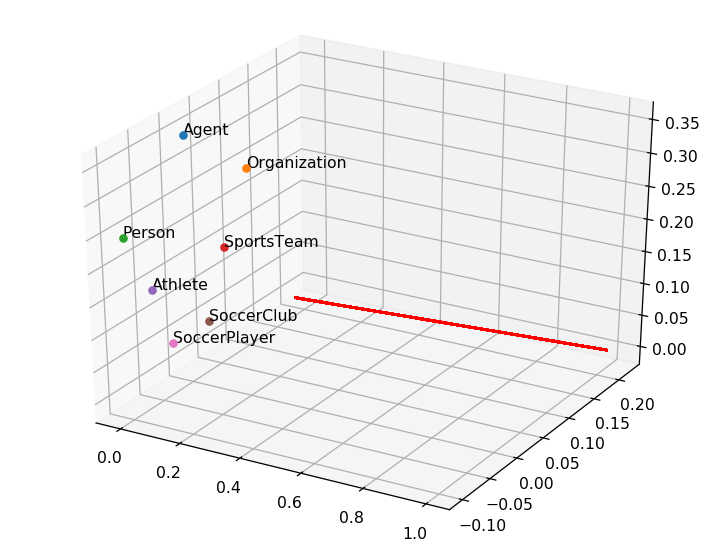

In [216]:
%matplotlib notebook 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter3D([-0.005], [0], [0.35], cmap='Greens');
ax.text(-0.005,0,0.35,  '%s' % ("Agent"), size=10, zorder=1,  color='k')

ax.scatter3D([0], [0.1], [0.25], cmap='Greens');
ax.text(0,0.1,0.25,  '%s' % ("Organization"), size=10, zorder=1,  color='k')

ax.scatter3D([-0.01], [-0.1], [0.25], cmap='Greens');
ax.text(-0.01,-0.1,0.25,  '%s' % ("Person"), size=10, zorder=1,  color='k')

ax.scatter3D([0], [0.06], [0.15], cmap='Greens');
ax.text(0,0.06,0.15,  '%s' % ("SportsTeam"), size=10, zorder=1,  color='k')

ax.scatter3D([-0.004], [-0.06], [0.15], cmap='Greens');
ax.text(-0.004,-0.06,0.15,  '%s' % ("Athlete"), size=10, zorder=1,  color='k')

ax.scatter3D([0], [0.030], [0.05], cmap='Greens');
ax.text(0,0.030,0.05,  '%s' % ("SoccerClub"), size=10, zorder=1,  color='k')

ax.scatter3D([-0.003], [-0.030], [0.05], cmap='Greens');
ax.text(-0.003,-0.030,0.05,  '%s' % ("SoccerPlayer"), size=10, zorder=1,  color='k')






In [528]:
vv = list(itertools.combinations(children("Athlete"), 2))

In [529]:
values = []
for i, j in vv:
    try:
        values.append((i,j,model_t.wv.similarity(i,j)))
    except:
        pass

In [533]:
sorted_by_second = sorted(values, key=lambda tup: tup[2])

In [545]:
def most_lowest_similar(concept):
    siblings = children(ont[concept].parents[0].id)
    siblings.remove(concept)
    values = []
    for i in siblings:
        try:
            values.append((i, model_t.wv.similarity(concept, i)))
        except:
            pass
    ordered = sorted(values, key=lambda tup: tup[1])
    return ordered[0], list(reversed(ordered))[0]

In [706]:
most_lowest_similar("Skyscraper")

((u'Hospital', 0.04462561898356242), (u'Museum', 0.33411973580334514))

In [728]:
from random import shuffle
concept = "Poem"
a = model_t.wv.most_similar(concept)
b = children(ont[concept].parents[0].id)
shuffle(b)
for k in [a[0][0]] + b[0:6]:
    print k

Writer
PeriodicalLiterature
Article
Comic
StatedResolution
Law
Poem


In [649]:
def first_two_most_similar(concept):
    siblings = children(ont[concept].parents[0].id)
    siblings.remove(concept)
    values = []
    for i in siblings:
        try:
            values.append((i, model_t.wv.similarity(concept, i)))
        except:
            pass
    ordered = list(reversed(sorted(values, key=lambda tup: tup[1])))
    return  ordered[0], ordered[1]

In [656]:
def most_similar_not_siblings(concpet):
    res = [k for k in model_t.wv.most_similar("SoccerPlayer")]
    return set(res) - set(siblings = children(ont[concept].parents[0].id))

In [713]:
most_similar_not_siblings("MilitaryPerson")

KeyError: <sematch.semantic.similarity.ConceptSimilarity instance at 0x7fe55505a7e8>

In [731]:
k = ["AmericanFootballLeague", 
"AustralianFootballLeague", 
"AutoRacingLeague", 
"BaseballLeague", 
"BasketballLeague", 
"BowlingLeague", 
"BoxingLeague", 
"CanadianFootballLeague", 
"CricketLeague", 
"CurlingLeague", 
"CyclingLeague", 
"FieldHockeyLeague", 
"FormulaOneRacing", 
"GolfLeague", 
"HandballLeague", 
"IceHockeyLeague", 
"InlineHockeyLeague", 
"LacrosseLeague", 
"MixedMartialArtsLeague", 
"MotorcycleRacingLeague", 
"PaintballLeague", 
"PoloLeague", 
"RadioControlledRacingLeague", 
"RugbyLeague", 
"SoccerLeague", 
"SoftballLeague", 
"SpeedwayLeague", 
"TennisLeague", 
"VideogamesLeague", 
"VolleyballLeague"]


filtered = []
for i in k:
    try:
        model_t[i]
        filtered.append(i)
    except:
        pass


/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:36: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [5]:
import pandas as pd
team_player = pd.read_csv(fd.GOLD_STANDARDS + "team_player", sep="\t", names=["a", "b"])
team_league = pd.read_csv(fd.GOLD_STANDARDS + "team_league", sep="\t", names=["a", "b"])
leage_player = pd.read_csv(fd.GOLD_STANDARDS + "league_player", sep="\t", names=["a", "b"])

In [7]:
import itertools
tp_run = (list(itertools.combinations(zip(team_player["a"], team_player["b"]), 2)))
tl_run = (list(itertools.combinations(zip(team_league["a"], team_league["b"]), 2)))
lp_run = (list(itertools.combinations(zip(leage_player["a"], leage_player["b"]), 2)))

In [797]:
with open(fd.GOLD_STANDARDS + "combined_sport_analogies", "w") as fi:
    for gd in [tp_run, tl_run, lp_run]:
        for first, second in gd:
            fi.write(first[0] + "\t" + first[1] + "\t" + second[0] + "\t" + second[1] + "\n")
            fi.write(second[0] + "\t" + second[1] + "\t" + first[0] + "\t" + first[1] + "\n")
            fi.write(first[1] + "\t" + first[0] + "\t" + second[1] + "\t" + second[0] + "\n")
            fi.write(second[1] + "\t" + second[0] + "\t" + first[1] + "\t" + first[0] + "\n")

        

In [8]:
akb = pd.read_csv(fd.GOLD_STANDARDS + "combined_sport_analogies", sep="\t", names=["first", "second", "third", "fourth"])

In [799]:
akb

,first,second,third,fourth
0,AmericanFootballTeam,AmericanFootballPlayer,AustralianFootballTeam,AustralianRulesFootballPlayer
1,AustralianFootballTeam,AustralianRulesFootballPlayer,AmericanFootballTeam,AmericanFootballPlayer
2,AmericanFootballPlayer,AmericanFootballTeam,AustralianRulesFootballPlayer,AustralianFootballTeam
3,AustralianRulesFootballPlayer,AustralianFootballTeam,AmericanFootballPlayer,AmericanFootballTeam
4,AmericanFootballTeam,AmericanFootballPlayer,BaseballTeam,BaseballPlayer
5,BaseballTeam,BaseballPlayer,AmericanFootballTeam,AmericanFootballPlayer
6,AmericanFootballPlayer,AmericanFootballTeam,BaseballPlayer,BaseballTeam
7,BaseballPlayer,BaseballTeam,AmericanFootballPlayer,AmericanFootballTeam
8,AmericanFootballTeam,AmericanFootballPlayer,BasketballTeam,BasketballPlayer
9,BasketballTeam,BasketballPlayer,AmericanFootballTeam,AmericanFootballPlayer


In [800]:
with open(fd.GOLD_STANDARDS + "combined_sport_analogies", "w") as fi:
    for index, row in akb.iterrows():
        try:
            model_t[row["first"]]
            model_t[row["second"]]
            model_t[row["third"]]
            model_t[row["fourth"]]
            fi.write(row["first"] + "\t" + row["second"] + "\t" + row["third"] + "\t" + row["fourth"] + "\n")
        except:
            pass

/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [9]:
akb = pd.read_csv(fd.GOLD_STANDARDS + "combined_sport_analogies", sep="\t", names=["first", "second", "third", "fourth"])


In [60]:
len(model_t.wv.vocab)

400

In [58]:
correct = 0
total = 0
rrank = 0
at_n = 0

for index, row in akb.iterrows():
    try:
        answer = model_t.most_similar(positive=[row["second"], row["third"]], negative=[row["first"]], topn=5)
        rrank = rrank + reciprocal_rank(row["fourth"], [k[0] for k in answer])
        #print(reciprocal_rank(row["fourth"], [k[0] for k in answer]) )
        if answer[0][0] == row["fourth"]:
            correct = correct + 1
        if row["fourth"] in [k[0] for k in answer]:
            at_n = at_n + 1
        if reciprocal_rank(row["fourth"], [k[0] for k in answer]) == 0:
            pass
            #print(row["second"], row["third"], row["first"], row["fourth"])
    except Exception as e:
        print(e)
    total = total+1

float(correct)/total, float(rrank)/total, float(at_n)/total


/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


(0.5011520737327189, 0.7151113671274969, 0.9792626728110599)

In [30]:
def reciprocal_rank(answer, result):
    try:
        value = 1.0/(result.index(answer)+ 1) 
        return value
    except ValueError as e:
        return 0

In [21]:
reciprocal_rank("a", ["", "b", "c", "a"])

0.25

In [843]:
model_t.most_similar(positive=["AmericanFootballTeam"])

/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[(u'AmericanFootballLeague', 0.8488806486129761),
 (u'AmericanFootballPlayer', 0.746071457862854),
 (u'NationalFootballLeagueEvent', 0.6634438037872314),
 (u'CanadianFootballTeam', 0.6618316769599915),
 (u'CanadianFootballLeague', 0.6573632955551147),
 (u'GridironFootballPlayer', 0.6178309917449951),
 (u'CollegeCoach', 0.6018756031990051),
 (u'BaseballTeam', 0.5696762204170227),
 (u'NCAATeamSeason', 0.5516179800033569),
 (u'SportsTeam', 0.5339109897613525)]

In [842]:
[k[0] for k in model_t.most_similar(positive=["AustralianRulesFootballPlayer", 
                                              "AmericanFootballTeam"], 
                                    negative=["AustralianFootballTeam"], topn=10)]

/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  from ipykernel import kernelapp as app


[u'AmericanFootballLeague',
 u'AmericanFootballPlayer',
 u'NationalFootballLeagueEvent',
 u'GridironFootballPlayer',
 u'CollegeCoach',
 u'CanadianFootballLeague',
 u'CanadianFootballTeam',
 u'NCAATeamSeason',
 u'BaseballTeam',
 u'School']

# Random Walks

In [8]:
import random
all_paths = nx.all_pairs_shortest_path(G)

# Choose a random source
source = random.choice(all_paths.keys())
# Choose a random target that source can access
target = random.choice(all_paths[source].keys())
# Random path is at
random_path = all_paths[source][target]

In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

scaler = MinMaxScaler(feature_range=(0, 1))

a = scaler.fit([1, 2, 3, 4, 5])

In [51]:
all_paths["Thing"]["Bone"]

['Thing', u'AnatomicalStructure', u'Bone']

In [195]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
start = []
end = []
settings = []
memory = []
all_paths = nx.all_pairs_shortest_path(G)
sources = (all_paths.keys())
#scaler = MinMaxScaler(feature_range=(0, 1))
# Choose a random target that source can access
components = []
paths = []
for source in G.nodes():
    if source != "Thing":
        continue
    # Choose a random source
    #source = random.choice(sources)
    # Choose a random target that source can access
    for target in all_paths[source].keys():

        if G[target] != {}:
            continue

        if source == target:
            continue
            
        # Random path is at
        random_path = all_paths[source][target]

        try:

            cids = [compute_informative_loss(k)[0] for k in random_path[:-1]]

            if np.isnan(cids).any():
                continue
            #ball = scaler.fit_transform(ball)

            #gen = scaler.transform(range(1, len(random_path) - 1) )
            lenghts = range(1, len(random_path))
            
            n_lengths = scaler.fit_transform(lenghts)

            paths.append(random_path[:-1])
            components = components + zip(cids, n_lengths, lenghts, random_path[:-1])
        except Exception as e:
            pass

In [196]:
len(paths)

409

In [197]:
unique_data = [list(x) for x in set(tuple(x) for x in paths)]
len(unique_data)

53

In [198]:
unique_data

[['Thing', u'Work', u'Cartoon'],
 ['Thing', u'ChemicalSubstance'],
 ['Thing', u'Agent', u'Person', u'Writer'],
 ['Thing', u'Agent', u'Person', u'FictionalCharacter'],
 ['Thing',
  u'Agent',
  u'Person',
  u'Athlete',
  u'MotorsportRacer',
  u'RacingDriver'],
 ['Thing', u'Work', u'WrittenWork', u'PeriodicalLiterature'],
 ['Thing', u'Place'],
 ['Thing', u'Name'],
 ['Thing', u'Place', u'ArchitecturalStructure'],
 ['Thing', u'Agent', u'Person', u'Artist', u'Actor'],
 ['Thing',
  u'Place',
  u'ArchitecturalStructure',
  u'Infrastructure',
  u'RouteOfTransportation'],
 ['Thing', u'Place', u'ArchitecturalStructure', u'AmusementParkAttraction'],
 ['Thing', u'Agent'],
 ['Thing', u'Place', u'PopulatedPlace', u'Settlement'],
 ['Thing', u'Place', u'NaturalPlace', u'BodyOfWater'],
 ['Thing', u'Place', u'ArchitecturalStructure', u'Building'],
 ['Thing', u'Biomolecule'],
 ['Thing', u'Food'],
 ['Thing', u'Work', u'WrittenWork'],
 ['Thing', u'Agent', u'Person', u'Politician'],
 ['Thing', u'Agent', u'Pe

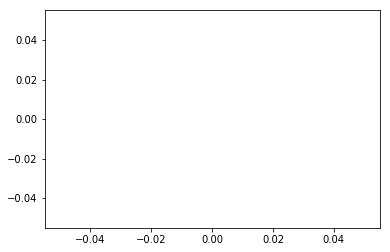

In [11]:
import numpy as np
import matplotlib.pyplot as plt

y = map(lambda x : x[0], components)
x = map(lambda x : x[1], components)

plt.scatter(x, y)
plt.show()

In [48]:
filter(lambda x: x[1] == 1, components)

[(0.2752802945617195, 1.0, u'Organisation'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.37087306864092656, 1.0, u'Athlete'),
 (0.13047110503229278, 1.0, u'Agent'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.13047110503229278, 1.0, u'Agent'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.13047110503229278, 1.0, u'Agent'),
 (0.3420142668955275, 1.0, u'Place'),
 (0.42931392220719067, 1.0, u'WrittenWork'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.37087306864092656, 1.0, u'Athlete'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.3420142668955275, 1.0, u'Place'),
 (0.3

In [178]:
len(component)

54

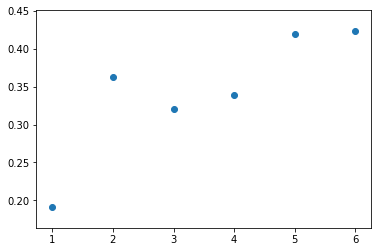

In [177]:
component = set(map(lambda x : (x[0], x[2], x[3]), components))
y = map(lambda x : x[0], component)
x = map(lambda x : x[1], component)

contain = []
for value in set(x):
    contain.append((np.average(map(lambda x : x[1], (filter(lambda x: x[0] == value, zip(x, y))))), value))

plt.scatter(map(lambda x: x[1], contain), map(lambda x: x[0], contain))
plt.show()

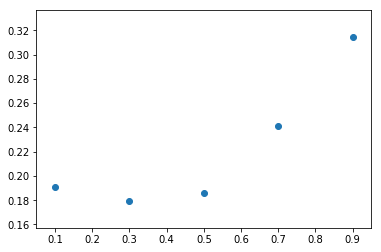

In [137]:
#component = set(components)
y = map(lambda x : x[0], components)
x = map(lambda x : x[1], components)

contain = []
for value in mini_list:
    filter_valid = filter(lambda x: (x[0] >= value[0] and  x[0] < value[1]), zip(x, y))
    avg = np.average(map(lambda x : x[1], filter_valid))
    contain.append((avg, value[0] + 0.1))

plt.scatter(map(lambda x: x[1], contain), map(lambda x: x[0], contain))
plt.show()

In [145]:
filtered_contain = map(lambda x : x[0], contain)

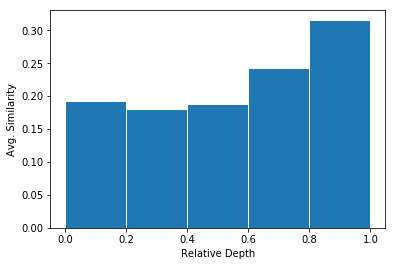

In [156]:
plt.xlabel("Relative Depth")
plt.ylabel("Avg. Similarity")

plt.hist([0.1,0.21,0.41,0.61,0.81,1.1], bins=[0,0.2,0.4,0.6,0.8, 1], weights=filtered_contain+ [0], rwidth=0.99)
plt.show()

In [165]:
bos = []
for i in sons_of_thing:
    try:
        bos.append(compute_informative_loss(i)[0])
    except:
        pass

In [171]:
import math
np.average([value for value in bos if not math.isnan(value)])

0.36245296075698213

In [13]:
contain = []
for value in set(x):
    contain.append((np.average(map(lambda x : x[1], (filter(lambda x: x[0] == value, zip(x, y))))), value))

In [173]:
compute_informative_loss("Agent")

(0.11802481135617318, 0.0)

In [355]:
contain = []
for value in set(x):
    contain.append((np.average(map(lambda x : x[1], (filter(lambda x: x[0] == value, zip(x, y))))), value))
    


In [398]:
(map(lambda x :x, (filter(lambda x: x[1] == 1 , components))))

[(0.2752802945617195, 1.0, u'Organisation'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.37087306864092656, 1.0, u'Athlete'),
 (0.13047110503229278, 1.0, u'Agent'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.13047110503229278, 1.0, u'Agent'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.2752802945617195, 1.0, u'Organisation'),
 (0.13047110503229278, 1.0, u'Agent'),
 (0.3420142668955275, 1.0, u'Place'),
 (0.42931392220719067, 1.0, u'WrittenWork'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.37087306864092656, 1.0, u'Athlete'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.26398223976707125, 1.0, u'Person'),
 (0.3420142668955275, 1.0, u'Place'),
 (0.3

In [356]:
contain

[(0.23476562490919844, 0.0),
 (0.23136805528269155, 0.5),
 (0.13047110503229278, 0.25),
 (0.30104850366596225, 1.0),
 (0.22244639279891656, 0.3333333333333333),
 (0.37087306864092656, 0.75),
 (0.28711050650834274, 0.6666666666666667)]

In [121]:
start = [x for x in start if str(x) != 'nan']
end = [x for x in end if str(x) != 'nan']

In [180]:
import numpy
np.average(start),np.average(end)

(0.20908934802790943, 0.3485312776557247)

In [183]:
all_data = zip(zip(start, end), settings)

In [202]:
start = map(lambda x: x[0][0], filter(lambda x : x[1][2] == 4, all_data))
end = map(lambda x: x[0][1], filter(lambda x : x[1][2] == 4, all_data))
np.average(start),np.average(end)

(0.1849416562279988, 0.35143639907122054)

# DBpeida to Wikidata

In [5]:
from itertools import chain

def unique_words(lines):
    return set(chain(*(line.split() for line in lines if line)))

In [13]:
filename = fd.STARTING_DATA_ROOT + "2016_data/annotated_text_with_entities"
words = set()
with open(filename, 'r') as f:
    for line in f:
        for word in line.split():
            words.add(word)
        

In [16]:
with open(fd.STARTING_DATA_ROOT + "2016_data/all_entities", "w") as file_write:
    for word in words:
        file_write.write(word + "\n")

In [1]:
import sys
import os
sys.path.append(os.getcwd() + "/../../") # notebooks are in a folder inside the project
from kge_from_text import folder_definitions as fd
exemplar = []
with open(fd.STARTING_DATA_ROOT + "2016_data/all_entities", "r") as file_read:
    examplar = file_read.readlines()

In [2]:
fd.STARTING_DATA_ROOT + "2016_data/all_entities"

'/home/vinid/PycharmProjects/kge_from_text/kge_from_text/data/starting_data/2016_data/all_entities'

In [2]:
import requests
import json
def get_type(mapping):

    from SPARQLWrapper import SPARQLWrapper, JSON
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery("""SELECT ?istance ?istanceLabel WHERE {
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
      wd:""" +mapping + """ wdt:P31 ?istance.
    }
    LIMIT 100""")
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()

    for result in results["results"]["bindings"]:
        return(result)['istance']['value'].replace('http://www.wikidata.org/entity/', "")
    
    return "####"


In [3]:
import requests
def get_mapping(entity):
    url = "https://www.wikidata.org/w/api.php?action=wbsearchentities&search="+ entity +"&language=en&format=json"
    res = requests.get(url).text
    if len(json.loads(res)['search'])>0:
        return json.loads(res)['search'][0]['id']
    else:
        return "####"

In [ ]:
import gensim
from IPython.display import clear_output
from multiprocessing import Pool
import random
import requests
import tqdm

lister = []
def computer(ent):
    try:
        ent = ent.strip()
        ma = get_mapping(ent)
#        if ma != "####":
#            ty = get_type(ma)
#        else:
#            ty = "####"
        
        if random.uniform(0,1) < 0.1:
            clear_output()
        
        return (ent, ma)
    except Exception as e:
        print(e)
        return ()


p = Pool(22)
lister = list(tqdm.tqdm(p.imap(computer, examplar), total=len(examplar)))


  0%|          | 228/1809634 [00:30<129:00:00,  3.90it/s]Process PoolWorker-2:
Traceback (most recent call last):
Process PoolWorker-3:
Process PoolWorker-4:
Process PoolWorker-1:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/

    chunked=chunked)
  File "/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/connection.py", line 284, in connect
  File "/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/connection.py", line 284, in connect
    chunked=chunked)
    conn = self._new_conn()
  File "/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/connectionpool.py", line 345, in _make_request
    conn = self._new_conn()
  File "/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/connection.py", line 141, in _new_conn
    self._validate_conn(conn)
  File "/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/connectionpool.py", line 345, in _make_request
  File "/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/connectionpool.py", line 844, in _validate_conn
    conn.connect()
    (self.host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/connection.py", line 141, in _new

In [9]:
with Pool(15) as p:
    p

AttributeError: __exit__

In [ ]:
to_remove = [
    "https://sw.wikipedia.org/wiki/",
    "https://nso.wikipedia.org/wiki/",
    "https://mt.wikipedia.org/wiki/",
    "https://ts.wikipedia.org/wiki/",
    "https://wn.wikipedia.org/"
]

In [7]:
del model_t

NameError: name 'model_t' is not defined

In [4]:


pbar = tqdm(total=49426151)
   
with open("/home/vinid/Documenti/wikidata-dbpedia/sitelins_cleaning", "w") as cleaning:
    with open("/home/vinid/Documenti/wikidata-dbpedia/wikidata-sitelinks.nt", "r") as reading:
        for line in reading:
            if "<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>" in line:
                continue
            if "<http://schema.org/inLanguage>" in line:
                continue
            if "https://en.wikipedia.org/" in line:
                cleaning.write(line)
                cleaning.flush()
            pbar.update(1)
pbar.close()

100%|██████████| 49426151/49426151 [05:20<00:00, 154356.70it/s]


In [5]:

pbar = tqdm(total=16611635)
   
with open("/home/vinid/Documenti/wikidata-dbpedia/wk_instances_cleaning", "w") as cleaning:
    with open("/home/vinid/Documenti/wikidata-dbpedia/wikidata-instances.nt", "r") as reading:
        for line in reading:
            if "http://www.wikidata.org/entity/" in line:
                cleaning.write(line)
                cleaning.flush()
            pbar.update(1)
pbar.close()

100%|██████████| 16611635/16611635 [00:51<00:00, 324023.99it/s]


In [6]:

pbar = tqdm(total=16611635)
   
with open("/home/vinid/Documenti/wikidata-dbpedia/wiki_links_cleaning", "w") as cleaning:
    with open("/home/vinid/Documenti/wikidata-dbpedia/wikipedia_links_en.ttl", "r") as reading:
        for line in reading:
            if "http://xmlns.com/foaf/0.1/isPrimaryTopicOf" in line:
                cleaning.write(line)
                cleaning.flush()
            pbar.update(1)
pbar.close()

49206690it [01:45, 466579.77it/s]                              


In [14]:
import pandas as pd
df = pd.read_csv("/home/vinid/Documenti/wikidata-dbpedia/wk_instances_cleaning", sep=" ", names = ["a", "b", "c", "d"])

In [18]:
df = df.set_index(["a"])

In [2]:
import pandas as pd
wd_wt = pd.read_csv("/home/vinid/Documenti/wikidata-dbpedia/wikidata_to_type", sep=" ", names=["wd", "wt"])

In [2]:
import pandas as pd
db_wi = pd.read_csv("/home/vinid/Documenti/wikidata-dbpedia/dbpedia_to_wikipedia", sep=" ", names=["db", "wi"])

In [27]:
import pandas as pd
wi_wd = pd.read_csv("/home/vinid/Documenti/wikidata-dbpedia/wikipedia_to_wikidata", sep=" ", names=["wi","wd"])

In [32]:
wd_wt = wd_wt.set_index("wd")

In [34]:
join_clean

,db
wd,
<http://www.wikidata.org/entity/Q2836000>,<http://dbpedia.org/resource/*-algebra>
<http://www.wikidata.org/entity/Q158615>,<http://dbpedia.org/resource/-ana>
<http://www.wikidata.org/entity/Q4544998>,<http://dbpedia.org/resource/-ase>
<http://www.wikidata.org/entity/Q4544999>,<http://dbpedia.org/resource/-bacter>
<http://www.wikidata.org/entity/Q4545003>,<http://dbpedia.org/resource/-eaux>
<http://www.wikidata.org/entity/Q4545001>,<http://dbpedia.org/resource/-ene>
<http://www.wikidata.org/entity/Q1048822>,<http://dbpedia.org/resource/-hou>
<http://www.wikidata.org/entity/Q20087662>,<http://dbpedia.org/resource/-ing>
<http://www.wikidata.org/entity/Q158646>,<http://dbpedia.org/resource/-ism>


In [10]:
first_joined = db_wi.join(wi_wd)

In [18]:
join_clean = first_joined.dropna().set_index("wd")

In [29]:
wi_wd = wi_wd.set_index("wi")

In [35]:
aaaa = join_clean.join(wd_wt)

In [36]:
aaaa

,db,wt
wd,,
<http://www.wikidata.org/entity/Q2836000>,<http://dbpedia.org/resource/*-algebra>,NaN
<http://www.wikidata.org/entity/Q158615>,<http://dbpedia.org/resource/-ana>,<http://www.wikidata.org/entity/Q102047>
<http://www.wikidata.org/entity/Q4544998>,<http://dbpedia.org/resource/-ase>,<http://www.wikidata.org/entity/Q111352>
<http://www.wikidata.org/entity/Q4544999>,<http://dbpedia.org/resource/-bacter>,<http://www.wikidata.org/entity/Q111352>
<http://www.wikidata.org/entity/Q4545003>,<http://dbpedia.org/resource/-eaux>,<http://www.wikidata.org/entity/Q102047>
<http://www.wikidata.org/entity/Q4545001>,<http://dbpedia.org/resource/-ene>,<http://www.wikidata.org/entity/Q111352>
<http://www.wikidata.org/entity/Q1048822>,<http://dbpedia.org/resource/-hou>,<http://www.wikidata.org/entity/Q2373060>
<http://www.wikidata.org/entity/Q20087662>,<http://dbpedia.org/resource/-ing>,<http://www.wikidata.org/entity/Q102047>
<http://www.wikidata.org/entity/Q158646>,<http://dbpedia.org/resource/-ism>,<http://www.wikidata.org/entity/Q102047>


In [42]:
aaaa.to_csv("/home/vinid/Documenti/wikidata-dbpedia/dbpedia_to_type_wikidata", sep=" ")

In [9]:
aaaa = pd.read_csv("/home/vinid/Documenti/wikidata-dbpedia/dbpedia_to_type_wikidata", sep=" ", names=["b", "c"])

In [10]:
aaaa = aaaa.set_index("b")
dictionary = aaaa['c'].to_dict()

In [12]:
dictionary['<http://dbpedia.org/resource/Barack_Obama>']

'<http://www.wikidata.org/entity/Q5>'

In [13]:
first_joined[first_joined.index == "<https://en.wikipedia.org/wiki/Barack_Obama>"]

,db,wd
wi,,
<https://en.wikipedia.org/wiki/Barack_Obama>,<http://dbpedia.org/resource/Barack_Obama>,<http://www.wikidata.org/entity/Q76>


In [ ]:
wd_wt = wd_wt.set_index("wd")
db_wi = db_wi.set_index("db")
wi_wd = wi_wd.set_index("wi")

In [17]:
bb = map(lambda x : x.replace("http:", "https:"), filtered_db_wi["wi"].values.tolist())

In [25]:
wi_wd_cleaned = wi_wd[wi_wd["wi"].isin(filtered_db_wi["wi"].values.tolist())]

In [30]:
wd_wt_cleaned = wd_wt[wd_wt["wd"].isin(wi_wd_cleaned["wd"].values.tolist())]

In [33]:
wd_wt_cleaned.to_csv("/home/vinid/Documenti/wikidata-dbpedia/wikidata_to_type", sep=" ")

In [28]:
wi_wd_cleaned.to_csv("/home/vinid/Documenti/wikidata-dbpedia/wikipedia_to_wikidata", sep=" ")

In [20]:
filtered_db_wi.to_csv("/home/vinid/Documenti/wikidata-dbpedia/dbpedia_to_wikipedia", sep=" ")

In [4]:
exi_buono = map(lambda x : "<http://dbpedia.org/resource/" + x.strip() + ">", examplar)

In [12]:
wi_wd.to_csv("/home/vinid/Documenti/wikidata-dbpedia/sitelins_cleaning_dropped", sep=" ")

In [4]:
kd = db_wi.join(wi_wd)

In [6]:
kd[kd.index == "<http://en.wikipedia.org/wiki/Barack_Obama>" ]

,db,wd
wi,,
<http://en.wikipedia.org/wiki/Barack_Obama>,<http://dbpedia.org/resource/Barack_Obama>,NaN


In [16]:
dbpedia_to_wd_type("Italy")

('Italy', '<Q3624078')

In [6]:
def dbpedia_to_wd_type(entity):
    try:
        wikipedia = db_wi[db_wi.index  == "<http://dbpedia.org/resource/" + entity + ">"]["wi"].values[0]
        wikidata = wi_wd[wi_wd.index  == wikipedia.replace("http:", "https:")]["wd"].values[0]
        return entity, wd_wt[wd_wt.index  == wikidata]["wt"].values[0].replace("http://www.wikidata.org/entity/", "").replace(">", "")
    except:
        return entity, "NULL"

In [ ]:
from tqdm import tqdm
pbar = tqdm(total=len(examplar))
   
with open("/home/vinid/Documenti/wikidata-dbpedia/dbpedia_to_wd_type", "w") as db_wt:
    for exemple in examplar:
        exa = exemple.strip()
        db_wt.write(exa + " " + dbpedia_to_wd_type(exa) + "\n")
        db_wt.flush()
        pbar.update(1)
pbar.close()

  0%|          | 40/1809634 [01:16<1054:41:52,  2.10s/it]

In [6]:
all_n = [k for k in model_t.wv.vocab]

q = list(filter(lambda x: x[0] == "Q", all_n))
d = list(filter(lambda x: x[0] != "Q", all_n))

In [7]:
import itertools

product = list(itertools.product(q, d))

In [8]:
len(product)

3187116

In [9]:
combinations = []
for a, b in product:
    combinations.append((a, b, model_t.similarity(a, b)))
    

/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


In [10]:
combinations.sort(key=lambda tup: tup[2], reverse=True)

In [11]:
for i, j, d in combinations[0:10]:
    print(str(i) + "\t" + j + str("\t") + str(d) + "\n")

Q4498974	HockeyTeam	0.9907905425792066

Q5107	Continent	0.9896989810284869

Q17374546	AustralianFootballTeam	0.9854050140464155

Q3001412	HorseRace	0.982821784569492

Q4022	River	0.9819847193282815

Q46970	Airline	0.9801730915799084

Q18127	RecordLabel	0.9783813793314395

Q13027888	BaseballTeam	0.9783684952324367

Q11424	Film	0.9781245176297494

Q1075	Colour	0.9770140770489402



In [46]:
to_test = combinations[:50]

In [36]:
to_test = set(combinations[:91])
matched = 0
total = 0
for wd, db, sim in to_test:
    if db in equivalent_match.keys():
        if wd == equivalent_match[db]:
            matched = matched + 1
        else:
            print(wd, db)
        total = total + 1
float(matched)/total, total

(u'Q1110794', u'Newspaper')
(u'Q958314', u'Grape')
(u'Q1107', u'Manga')
(u'Q941818', u'InformationAppliance')
(u'Q15679210', u'Racecourse')
(u'Q2235308', u'Ship')
(u'Q5741069', u'Band')
(u'Q13027888', u'BaseballLeague')
(u'Q19832486', u'Locomotive')
(u'Q5398426', u'TelevisionShow')
(u'Q3001412', u'Racecourse')
(u'Q15056993', u'Aircraft')
(u'Q55488', u'Station')
(u'Q17374546', u'AustralianRulesFootballPlayer')
(u'Q8076', u'InformationAppliance')
(u'Q3504248', u'Planet')
(u'Q5633421', u'AcademicJournal')
(u'Q902378', u'Racecourse')
(u'Q1151733', u'BaseballLeague')


(0.62, 50)

In [82]:
len(mappings), len(maps_to_test)

(427, 183)

In [4]:
with open(fd.STARTING_DATA_ROOT + "2016_data/missing_mappings_ontology_dbpedia_wikidata") as writing_in:
    mappings = writing_in.readlines()

In [5]:
maps_to_test = []
for k in mappings:
    try:
        model_t[k.strip()]
        maps_to_test.append(k.strip())
    except:
        pass

/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [76]:
seen = matched

In [84]:
matched = []
for k in maps_to_test:
    res = model_t.most_similar(positive=[k])
    if res[0][1] > 0.85 and res[0][0][0] == "Q":
        matched.append((res[0][0], k))
        

/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  app.launch_new_instance()


In [85]:
set(matched)

{(u'Q10438042', 'BusCompany'),
 (u'Q1075', 'Colour'),
 (u'Q11416', 'PokerPlayer'),
 (u'Q12284', 'Canal'),
 (u'Q130003', 'SkiArea'),
 (u'Q13027888', 'BaseballTeam'),
 (u'Q13393265', 'BasketballLeague'),
 (u'Q13393265', 'BasketballTeam'),
 (u'Q14350', 'RadioStation'),
 (u'Q14645593', 'RugbyClub'),
 (u'Q15061650', 'GolfLeague'),
 (u'Q152081', 'ConcentrationCamp'),
 (u'Q159821', 'Olympics'),
 (u'Q15991303', 'SoccerLeague'),
 (u'Q1616075', 'TelevisionStation'),
 (u'Q16466010', 'FootballMatch'),
 (u'Q17156793', 'AmericanFootballTeam'),
 (u'Q17271186', 'CanadianFootballTeam'),
 (u'Q17374546', 'AustralianFootballTeam'),
 (u'Q17376093', 'CricketTeam'),
 (u'Q178561', 'MilitaryConflict'),
 (u'Q19317', 'SoccerTournament'),
 (u'Q19723444', 'Device'),
 (u'Q20074337', 'FormulaOneTeam'),
 (u'Q2085381', 'Publisher'),
 (u'Q22698', 'Park'),
 (u'Q2537906', 'WomensTennisAssociationTournament'),
 (u'Q2658935', 'BeautyQueen'),
 (u'Q2977', 'HistoricBuilding'),
 (u'Q3001412', 'HorseRace'),
 (u'Q3146899', 'Dioc

In [ ]:
for i, j in equivalent_match:
    try:
        combinations = []
        for a, b in product:
            combinations.append((a, b, model_t.similarity(a, b)))

### Plotting

/home/vinid/.local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


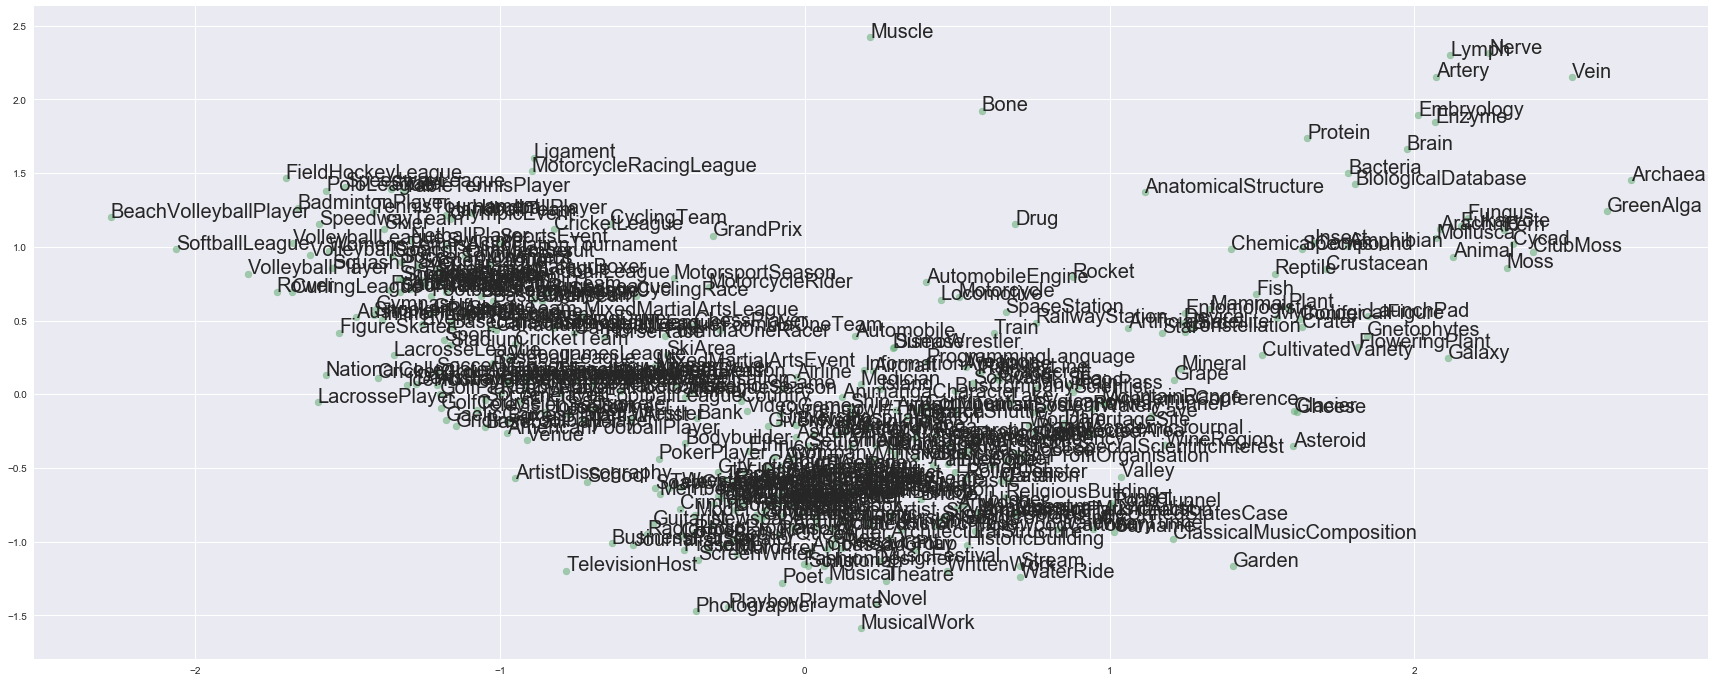

In [12]:
### plot
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

vocab = list(model_t.wv.vocab)
X = model_t[vocab] 

tsne = PCA(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']



In [15]:
years = ["Mammal", "MusicalWork", "Novel", "SoccerPlayer", "Wrestler", "BasketballPlayer"]
plot_df = df[df["word"].isin(years)]


In [35]:
plot_df.y.values[0]

-0.039191815679164646

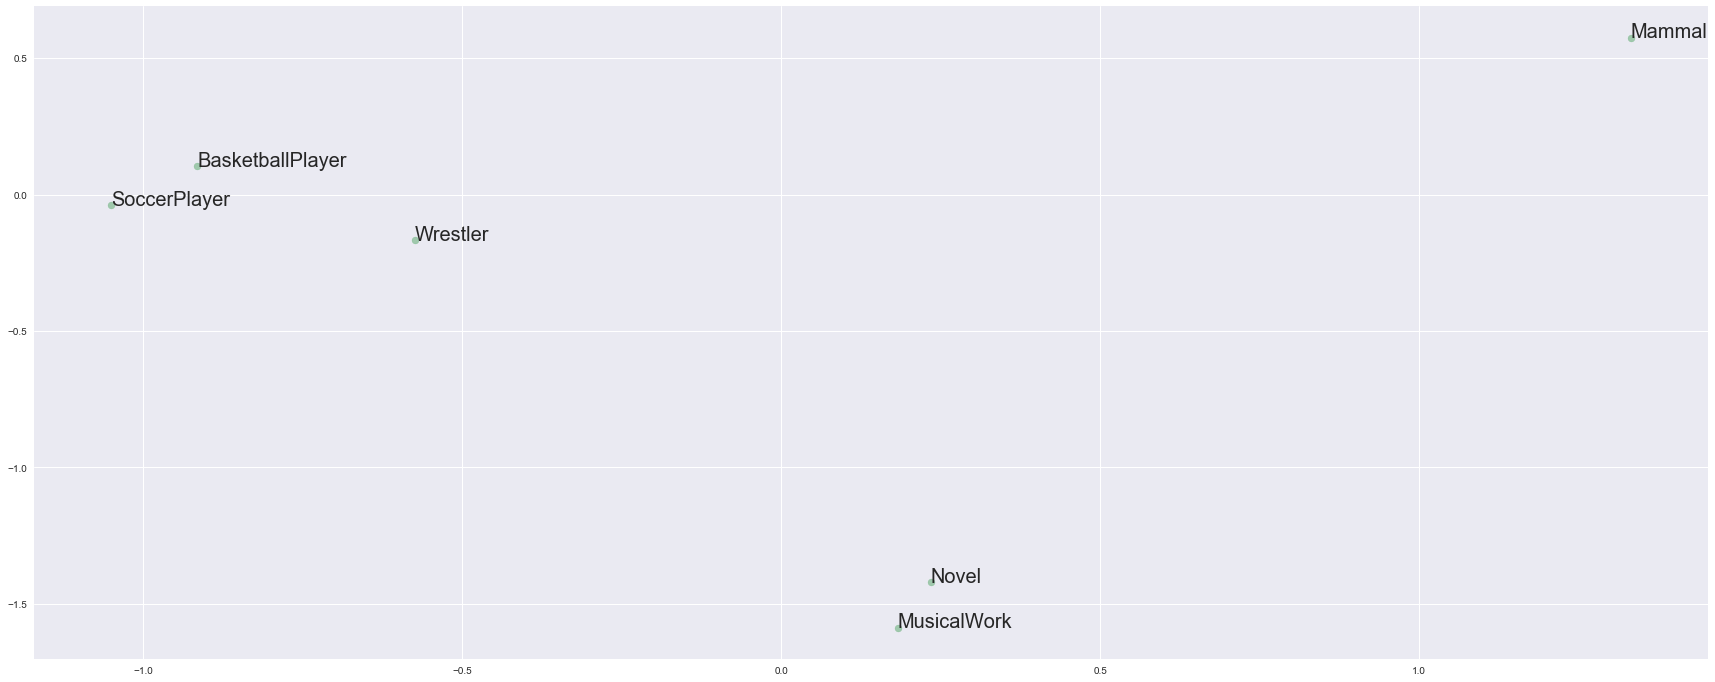

In [17]:

fig = plt.figure(figsize=(30, 12))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(plot_df['x'], plot_df['y'], c="g", alpha=0.5)

for i, txt in enumerate(plot_df['word']):
    b= ax.annotate(txt, (plot_df['x'].iloc[i], plot_df['y'].iloc[i]), size=20)

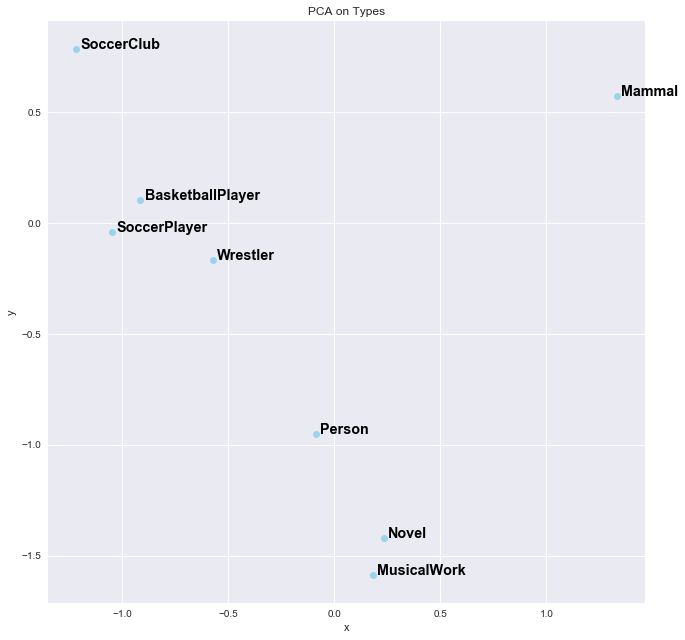

In [47]:
import seaborn as sns; sns.set(color_codes=True)
years = ["Mammal", "MusicalWork", "Novel", "SoccerPlayer", "Wrestler", "BasketballPlayer", "Person", "SoccerClub"]
plot_df = df[df["word"].isin(years)]


fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10.7, 10.7)

p1 = sns.regplot(plot_df['x'], plot_df['y'], color="skyblue", ax=ax,fit_reg=False)
ax.set(title='PCA on Types')
for line in range(0,plot_df.shape[0]):
    p1.text(plot_df.x.values[line]+0.02, plot_df.y.values[line], plot_df.word.values[line], horizontalalignment='left', size='large', color='black', weight='semibold')

In [10]:
def parents(val):
    return  [d.id for d in ont[val].parents]

parents("SoccerPlayer")

['Athlete']

In [270]:
nodes = G.nodes()

training_samples = []

for k in nodes:
    if k == "Thing":
        continue
    try:
        p = r_parents(k)
    except:
        continue
    for pi in p:
        training_samples.append((k, pi, 1))



In [272]:
(list(filter(lambda x : x[2] == 1, training_samples)))

[('Airline', 'Company', 1),
 ('Airline', 'Organisation', 1),
 ('Airline', 'Agent', 1),
 ('Airline', 'Thing', 1),
 ('Competition', 'Event', 1),
 ('Competition', 'Thing', 1),
 ('AcademicJournal', 'PeriodicalLiterature', 1),
 ('AcademicJournal', 'WrittenWork', 1),
 ('AcademicJournal', 'Work', 1),
 ('AcademicJournal', 'Thing', 1),
 ('Racecourse', 'RaceTrack', 1),
 ('Racecourse', 'SportFacility', 1),
 ('Racecourse', 'ArchitecturalStructure', 1),
 ('Racecourse', 'Place', 1),
 ('Racecourse', 'Thing', 1),
 ('Fiefdom', 'HistoricalAreaOfAuthority', 1),
 ('Fiefdom', 'AdministrativeRegion', 1),
 ('Fiefdom', 'Region', 1),
 ('Fiefdom', 'PopulatedPlace', 1),
 ('Fiefdom', 'Place', 1),
 ('Fiefdom', 'Thing', 1),
 ('Station', 'Infrastructure', 1),
 ('Station', 'ArchitecturalStructure', 1),
 ('Station', 'Place', 1),
 ('Station', 'Thing', 1),
 ('Parliament', 'Organisation', 1),
 ('Parliament', 'Agent', 1),
 ('Parliament', 'Thing', 1),
 ('TennisLeague', 'SportsLeague', 1),
 ('TennisLeague', 'Organisation', 

In [295]:
import random

for i in range(0, 10*len(training_samples)):
    data = random.sample(nodes, 2)
    if [data[0], data[1]] in training_samples:
        continue
    else:
        training_samples.append((data[0], data[1], 0))
    
    

In [257]:
vocab_t = [k for k in model_t.wv.vocab]

('Territory', 'Place', 1)

In [296]:
for a,b, c in training_samples:
    if a in vocab_t and b in vocab_t:
        tt_good.append((model_t[a], model_t[b], c))

/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [297]:
len(tt_good)

8089

In [292]:
list(filter(lambda x : x[2] == 1, tt_good))

[('Territory', 'Place', 1),
 ('TelevisionHost', 'Agent', 1),
 ('AdultActor', 'Actor', 1),
 ('FootballLeagueSeason', 'SportsTeamSeason', 1),
 ('NaturalEvent', 'Thing', 1),
 ('Sculpture', 'Thing', 1),
 ('BodyOfWater', 'Thing', 1),
 ('BrownDwarf', 'CelestialBody', 1),
 ('Psychologist', 'Agent', 1),
 ('GolfTournament', 'Thing', 1),
 ('Bodybuilder', 'Person', 1),
 ('Model', 'Person', 1),
 ('NobleFamily', 'Thing', 1),
 ('HorseRace', 'Event', 1),
 ('Bridge', 'Thing', 1),
 ('Canoeist', 'Thing', 1),
 ('MathematicalConcept', 'TopicalConcept', 1),
 ('AdultActor', 'Artist', 1),
 ('Monastery', 'Thing', 1),
 ('GraveMonument', 'Monument', 1),
 ('OverseasDepartment', 'Region', 1),
 ('Road', 'RouteOfTransportation', 1),
 ('Company', 'Thing', 1),
 ('Software', 'Work', 1),
 ('FormulaOneRacing', 'SportsLeague', 1),
 ('Document', 'Work', 1),
 ('MilitaryAircraft', 'Thing', 1),
 ('NobleFamily', 'Agent', 1),
 ('BoxingLeague', 'Agent', 1),
 ('Skier', 'Thing', 1),
 ('SquashPlayer', 'Thing', 1),
 ('MotorcycleRac

In [309]:
import numpy as np
father_input_tot = []
son_input_tot = []
detect_output_tot = []
tt_good = []
gooz_sample = []
count = 0
np.random.shuffle(training_samples) 

for a,b, c in training_samples:
    if a in vocab_t and b in vocab_t:
        tt_good.append((model_t[a], model_t[b], c))
        gooz_sample.append((a,b,c))

for a, b, c in tt_good:
    count = count + 1
    father_input_tot.append(a)
    son_input_tot.append(b)
    detect_output_tot.append(c)
    

father_input_tot = np.array(father_input_tot)
son_input_tot = np.array(son_input_tot)
detect_output_tot = np.array(detect_output_tot)

/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [311]:
len(detect_output_tot)

7483

In [312]:
father_input_train = father_input_tot[0:5000]
son_input_train = son_input_tot[0:5000]
detect_output_train = detect_output_tot[0:5000]

father_input_valid = father_input_tot[5000:6000]
son_input_valid = son_input_tot[5000:6000]
detect_output_valid = detect_output_tot[5000:6000]

father_input_test = father_input_tot[6000:]
son_input_test = son_input_tot[6000:]
detect_output_test = detect_output_tot[6000:]

In [209]:
len(father_input_tot)

2286

In [323]:
values = zip(father_input_tot,son_input_tot, detect_output_tot)
list_of_dif = []
list_of_kind = []

for a, b, c in values:
    list_of_dif.append(a-b)
    list_of_kind.append(c)

array([-0.14190693,  0.23372188, -0.4071885 ,  0.4018428 , -0.08565152,
        0.46137348, -0.1794133 ,  0.2308405 , -0.1656445 , -0.20083208,
        0.03441143,  0.08875582, -0.33117437, -0.18814552,  0.18624246,
       -0.11256006,  0.42230064,  0.04221715,  0.01481405,  0.48303801,
        0.2777406 , -0.01971841, -0.30321562,  0.44830671,  0.29804486,
        0.21794859,  0.10605709,  0.35536504,  0.02739032, -0.29031482,
       -0.33661038,  0.31211013, -0.37295279,  0.0072734 , -0.0669939 ,
       -0.26448914, -0.12321649, -0.14335456,  0.38498941,  0.11167332,
       -0.16746441,  0.03044481, -0.07545827, -0.20509604, -0.27752885,
       -0.34811732,  0.03437471,  0.22440994, -0.22693652, -0.01042853,
       -0.05101453, -0.34342676, -0.25211954, -0.06144116,  0.18891321,
        0.43950644, -0.14265946,  0.08743197,  0.18031117,  0.16306101,
       -0.01778107,  0.21820092, -0.26744166, -0.1909889 ,  0.36021695,
       -0.28739634, -0.07683197, -0.13761938, -0.23584267,  0.23

In [287]:
len(list(filter(lambda x : x == 1, list_of_kind)))

265

In [324]:
### plot
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

vocab = list_of_kind
X = np.array(list_of_dif)

tsne = PCA(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']



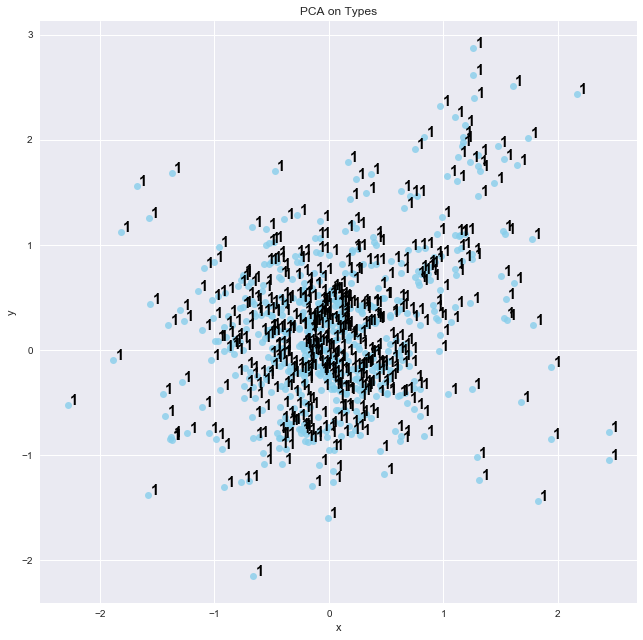

In [327]:
import seaborn as sns; sns.set(color_codes=True)
years = ["1"]
plot_df = df[df["word"].isin(years)]


fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10.7, 10.7)

p1 = sns.regplot(plot_df['x'], plot_df['y'], color="skyblue", ax=ax,fit_reg=False)
ax.set(title='PCA on Types')
for line in range(0,plot_df.shape[0]):
    p1.text(plot_df.x.values[line]+0.02, plot_df.y.values[line], plot_df.word.values[line], horizontalalignment='left', size='large', color='black', weight='semibold')

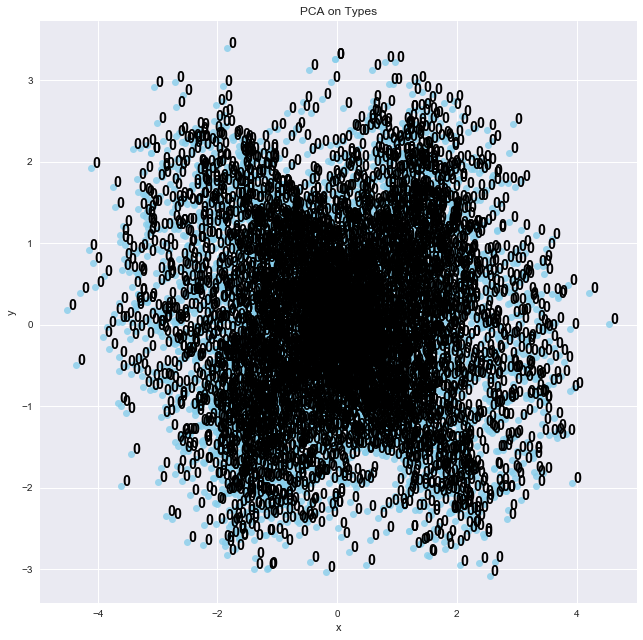

In [326]:
import seaborn as sns; sns.set(color_codes=True)
years = ["0"]
plot_df = df[df["word"].isin(years)]


fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10.7, 10.7)

p1 = sns.regplot(plot_df['x'], plot_df['y'], color="skyblue", ax=ax,fit_reg=False)
ax.set(title='PCA on Types')
for line in range(0,plot_df.shape[0]):
    p1.text(plot_df.x.values[line]+0.02, plot_df.y.values[line], plot_df.word.values[line], horizontalalignment='left', size='large', color='black', weight='semibold')

In [313]:
father_net_input = Input(shape=(father_size,))
encoded_father = layers.Dense(100, activation='tanh')(father_net_input) 

son_net_input = Input(shape=(son_size,))
encoded_son = layers.Dense(100, activation='tanh')(son_net_input)

concatenated = layers.concatenate([encoded_father, encoded_son], axis=-1)
concatenated_new = layers.Dense(100, activation='tanh')(concatenated)

answer = layers.Dense(1, activation='sigmoid')(concatenated_new)

model = Model([father_net_input, son_net_input], answer)
model.compile(loss='binary_crossentropy', optimizer='rmsprop')
model.fit([father_input_train, son_input_train], detect_output_train, 
          validation_data=([father_input_valid,son_input_valid], detect_output_valid), epochs=30, batch_size=10)


Train on 5000 samples, validate on 1000 samples
Epoch 1/30
5000/5000 [==============================] - 1s 283us/step - loss: 0.1738 - val_loss: 0.1490
Epoch 2/30
5000/5000 [==============================] - 1s 182us/step - loss: 0.1268 - val_loss: 0.1374
Epoch 3/30
5000/5000 [==============================] - 1s 188us/step - loss: 0.1042 - val_loss: 0.1329
Epoch 4/30
5000/5000 [==============================] - 1s 187us/step - loss: 0.0879 - val_loss: 0.1554
Epoch 5/30
5000/5000 [==============================] - 1s 189us/step - loss: 0.0777 - val_loss: 0.1374
Epoch 6/30
5000/5000 [==============================] - 1s 185us/step - loss: 0.0712 - val_loss: 0.1411
Epoch 7/30
5000/5000 [==============================] - 1s 186us/step - loss: 0.0625 - val_loss: 0.1148
Epoch 8/30
5000/5000 [==============================] - 1s 185us/step - loss: 0.0540 - val_loss: 0.1190
Epoch 9/30
5000/5000 [==============================] - 1s 186us/step - loss: 0.0481 - val_loss: 0.1191
Epoch 10/30
5000

In [163]:
input_one = np.array([model_t["FashionDesigner"]])
input_two = np.array([model_t["Artist"]])
model.predict([input_one, input_two])[0]


/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.9999963], dtype=float32)

In [328]:
one_predicted_was_one = 0
zero_predicted_was_one = 0
one_predicted_was_zero = 0
zero_predicted_was_zero = 0

for a, b, c in gooz_sample[6000:]:
    input_one = np.array([model_t[a]])
    input_two = np.array([model_t[b]])
    pred = model.predict([input_one, input_two])
    
    if c==0 and round(pred[0][0]) == 0:
        zero_predicted_was_zero = zero_predicted_was_zero + 1
    if c==1 and round(pred[0][0]) == 0:
        zero_predicted_was_one = zero_predicted_was_one + 1
    if c==0 and round(pred[0][0]) == 1:
        one_predicted_was_zero = one_predicted_was_zero + 1
    if c==1 and round(pred[0][0]) == 1:
        one_predicted_was_one = one_predicted_was_one + 1
    
    if c != round(pred[0][0]):
        count = count + 1
        #print(a,b,pred[0][0])

/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/home/vinid/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [329]:
one_predicted_was_one, zero_predicted_was_one, one_predicted_was_zero, zero_predicted_was_zero

(89, 24, 25, 1345)

In [321]:
len(list(filter(lambda x : x[2] == 1, gooz_sample[6000:])))

113

In [2]:
import torch
model = torch.load("/home/vinid/Scrivania/dbpedia.pth")

In [23]:
model["objects"]

[u'NaturalEvent',
 u'Earthquake',
 u'SolarEclipse',
 u'StormSurge',
 u'Province',
 u'HistoricalProvince',
 u'TimePeriod',
 u'CareerStation',
 u'GeologicalPeriod',
 u'HistoricalPeriod',
 u'PeriodOfArtisticStyle',
 u'PrehistoricalPeriod',
 u'ProtohistoricalPeriod',
 u'Year',
 u'YearInSpaceflight',
 u'AnatomicalStructure',
 u'Artery',
 u'BloodVessel',
 u'Bone',
 u'Brain',
 u'Embryology',
 u'Ligament',
 u'Lymph',
 u'Muscle',
 u'Nerve',
 u'Vein',
 u'Territory',
 u'OldTerritory',
 u'Beverage',
 u'Beer',
 u'Vodka',
 u'Wine',
 u'ControlledDesignationOfOriginWine',
 u'Department',
 u'OverseasDepartment',
 u'SportsSeason',
 u'MotorsportSeason',
 u'SportsTeamSeason',
 u'BaseballSeason',
 u'FootballLeagueSeason',
 u'NCAATeamSeason',
 u'SoccerClubSeason',
 u'SoccerLeagueSeason',
 u'FloweringPlant',
 u'Grape',
 u'SportCompetitionResult',
 u'OlympicResult',
 u'SnookerWorldRanking',
 u'Tower',
 u'Lighthouse',
 u'WaterTower',
 u'ReligiousBuilding',
 u'Abbey',
 u'Church',
 u'Monastery',
 u'Mosque',
 u'S

In [13]:
from scipy.spatial.distance import cosine

def get_type_index(ty):
    return model["objects"].index(ty)
    
def get_type_vector(ty):
    index = get_type_index(ty)
    return model["model"]["lt.weight"][index]
    
def compare_types_hy(t_1, t_2):
    return 1 - cosine(get_type_vector(t_1), get_type_vector(t_2))

In [22]:
import numpy as np
X = []
for k in model["model"]["lt.weight"]:
    X.append(k.numpy())

X = np.array(X)

In [26]:
### plot
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 


tsne = PCA(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(model["objects"])],
               axis=1)

df.columns = ['x', 'y', 'word']



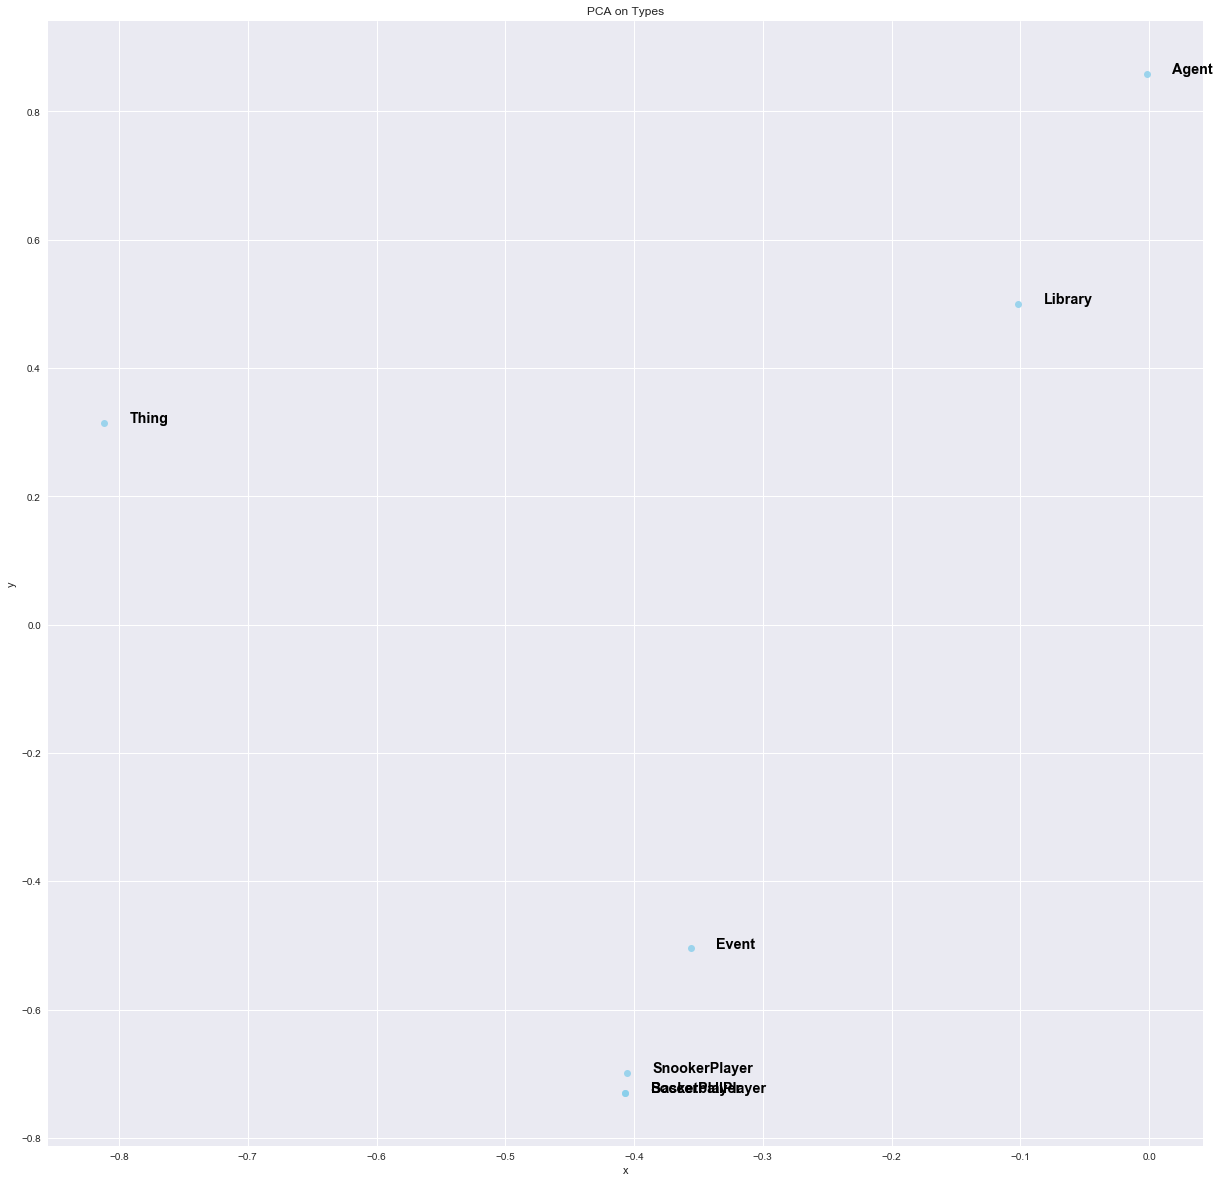

In [36]:
import seaborn as sns; sns.set(color_codes=True)
plot_df = df[df["word"].isin(["SoccerPlayer", "Agent", "Thing", "Library", "BasketballPlayer", "Event", "SnookerPlayer"])]
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 20.7)

p1 = sns.regplot(plot_df['x'], plot_df['y'], color="skyblue", ax=ax,fit_reg=False)
ax.set(title='PCA on Types')
for line in range(0,plot_df.shape[0]):
    p1.text(plot_df.x.values[line]+0.02, plot_df.y.values[line], plot_df.word.values[line], horizontalalignment='left', size='large', color='black', weight='semibold')